# Infix, Postfix, Prefix conversions and evaluations

## Infix to Postfix

for infix to prefix, use postfix to prefix as second step.

In [1]:
exp = "a+b*(c^d-e)^(f+g*h)-i"

def solve(exp):
    ans = []
    stack = []
    
    # operator and brackets stays in stack while aperands stay inside ans list.
    
    # operator precendence order
    op = {'+': 1, '-': 1, '*': 2, '/': 2, '^': 3}
    
    for i in exp:
        
        # if a char is an operator it must be strictly greater in precesdence than others inside stack.
        # no operator can pop '('.
        # every popped operator is pushed into ans lis t.
        if i in op.keys():
            print(i, stack)
            while stack and stack[-1] != '(' and op[stack[-1]] >= op[i]:
                ans.append(stack.pop())
            stack.append(i)
            
        elif i == '(':
            stack.append(i)
            
        # append all operators into ans list until an '(' is encountered
        elif i == ')':
            while stack and stack[-1] != '(':
                ans.append(stack.pop())
            if stack and stack[-1] == '(': stack.pop()
                
        else:
            ans.append(i)
    
    # append all left operators into ans list
    while stack: ans.append(stack.pop())
    return "".join(ans)

print(exp)
print(solve(exp))

a+b*(c^d-e)^(f+g*h)-i
+ []
* ['+']
^ ['+', '*', '(']
- ['+', '*', '(', '^']
^ ['+', '*']
+ ['+', '*', '^', '(']
* ['+', '*', '^', '(', '+']
- ['+', '*', '^']
abcd^e-fgh*+^*+i-


## Prefix to Infix

In [2]:
exp = "*-A/BC-/AKL"

def solve(exp):
    stack = []
    op = {'+': 1, '-': 1, '*': 2, '/': 2, '^': 3}
    for i in reversed(exp):
        if i in op.keys():
            a = stack.pop()
            b = stack.pop()
            c = '(' + a + i + b + ')'
            stack.append(c)
        else:
            stack.append(i)
        
    return stack.pop()

print(solve(exp))

((A-(B/C))*((A/K)-L))


## Prefix to Postfix

In [3]:
exp = "*-A/BC-/AKL"

def solve(exp):
    stack = []
    op = {'+': 1, '-': 1, '*': 2, '/': 2, '^': 3}
    for i in reversed(exp):
        if i in op.keys():
            a = stack.pop()
            b = stack.pop()
            c = a + b + i
            stack.append(c)
        else:
            stack.append(i)
    
    return stack.pop()

print(solve(exp))

ABC/-AK/L-*


### calculator

# Parenthesis Problems

## balance parenthesis
Given an expression string x. Examine whether the pairs and the orders of “{“,”}”,”(“,”)”,”\[“,”\]” are correct in exp.
For example, the function should return 'true' for exp = “\[()\]{}{\[()()\]()}” and 'false' for exp = “\[(\])”.

In [4]:
def solve(x):
        stack = []
        d = {'(': ')', '{': '}', '[': ']'}
        for i in x:
            if i in ")}]":
                # if encountered a closing bracket then
                # condition 1:
                #   whenever there is a closing bracket it must match its opening one.
                # condition 2:
                #   stack should not be empty
                if not stack: return False
                if d[stack[-1]] != i: return False
                stack.pop()
            else: stack.append(i)
        
        # stack must be empty in the end
        if stack: return False
        return True
    
exp = "{([])}"
exp = "()()"
print(solve(exp))

True


## All valid parenthesis

In [5]:
def AllParenthesis(n):
    def solve(n, o=0, c=0, ans=''):
        if o == c and o + c == 2*n: total.append(ans)
        if c > o: return 
        if o > n: return
        if o+c > 2*n: return 
        
        solve(n, o+1, c, ans + '(')
        solve(n, o, c+1, ans + ')')
    total = []
    solve(n)
    return total
print(AllParenthesis(3))

['((()))', '(()())', '(())()', '()(())', '()()()']


## maximum depth parenthesis

In [6]:
def solve(s):
    count = ans = 0
    for i in s:
        if i == '(': count += 1
        else: count -= 1
        ans = max(ans, count)
    
    return ans

s = "((())((())))"
print(solve(s))

4


## Longest Valid parenthesis

In [7]:
# since we are tracking the index in stack therefore 
# while remove valid brackets we can dircetly check till where the valid
# bracket is and keep track the max.
def solve(s):
    stack = [-1]
    ans = 0
    for i, val in enumerate(s):
        if val == '(':
            stack.append(i)
        else:
            stack.pop()
            if stack:
                ans = max(ans, i - stack[-1])
            else:
                stack.append(i)
    return ans

s = "(())((())))))("
print(solve(s))

10


## Minimum number of bracket reversals

In [8]:
def solve(s):
    stack = []
    if len(s)&1: return -1
    for i in s:
        # this technique will only keep invalid parenthesis
        if i == '}' and stack and stack[-1] == '{': stack.pop()
        else: stack.append(i)
            
    a = b = 0
    for i in stack:
        if i == '{': a += 1
        else: b += 1
    
    return a//2 + b//2 + 2*(a&1) # if a is odd then so is b in that case 
                                 # the final situation will be }{ 
                                 # and here we have to filp both

s = "}{{}}{{{"
print(solve(s))

3


## Redundant Brackets

The idea is to keep pushing elements into stack.  
once you get ")" pop until you get "(" and then check if exp between "(" and ")" has any 
operator if yes then not redundant and so push '#' to replace (a+b)   
and continue and if no operator in exp then break because its redundant

In [9]:
lis = ["(a+b*(c-d))", "((c-d)*a+b/(e))", "((a-)b)"]

def solve(A):
        operators = ["*", "/", "+", "-"]
        stack = []
        
        def Any(e):
            for i in operators:
                if i in e: return True
            return False

        for i in A:
            if i == ')':
                e = ''
                while stack and stack[-1] != '(': e += stack.pop()
                if stack: stack.pop()
                if not Any(e): return True
                stack.append('#')
            else:
                stack.append(i)
        
        return False

for i in lis:
    print(solve(i))

False
True
True


# Binary tree searlize and deserealize

## Construct String from Binary Tree

In [10]:
def tree2str(root) -> str:
        if root is None: return ""
        if root.left is None and root.right is None: return str(root.val)
        s = str(root.val)
        s += '(' + tree2str(root.left) + ')'
        if root.right:
            s += '(' + tree2str(root.right) + ')'
        
        return s

## Construct Binary Tree from string

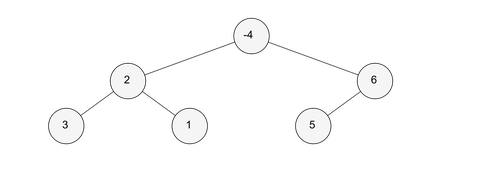

In [16]:
from treeVisuals import visual, DrawTree
    
def str2tree(s):
    # write your code here
    lis = parse2(s)
    def rec(s):
        if not s: return None
        val, s1, s2 = parse(s)
        root = TreeNode(val)
        root.left = rec(s1)
        root.right = rec(s2)
        return root

    return rec(lis)
  
# to seperate integers and other characters in a string.
# lis "-123(23(3)(-4))" => ['-123', '(', '23', '(', '3', ')', '(', '-4', ')', ')']
def parse2(s):
    i = 0
    lis = []
    while i<len(s):
        start = i
        if s[i].isdigit() or s[i] == '-':
            while s[i].isdigit() or s[i] == '-': i+=1
            lis.append(s[start: i])
            i-=1
        else:
            lis.append(s[i])
        i+=1

    return lis

def parse(s):
    a = b = 1
    count = 0
    flag = False
    for i in range(len(s)):
        if s[i] == '(': count += 1
        elif s[i] == ')': count -= 1

        if count == 1 and not flag: 
            a = i
            flag = True

        if count == 0 and flag:
            b = i
            break

    val = int("".join(s[:a]))
    s1 = s[a+1:b]
    s2 = s[b+2:-1]
    return val, s1, s2

s = "-4(2(3)(1))(6(5))"
DrawTree(str2tree(s), (300, 300)).drawTree()

# Next Greatest Element 

In [17]:
def solve(arr):
    n = len(arr)
    stack = []
    ans = [-1]*n
    for i in reversed(range(n)):
        while stack and stack[-1] <= arr[i]: stack.pop()
        ans[i] = stack[-1] if stack else -1
        stack.append(arr[i])

    return ans

arr = [6, 8, 0, 1, 3]
print(solve(arr))

[8, -1, 1, 3, -1]


## Stock span Problem

Given the price of the stocks per days, return the no of days for which the price of a particular day stays maximum among all the previous days.

***This is basically next greatest element from left.***

In [18]:
def solve(stocks):
    stack = []
    n = len(stocks)
    ans = [1]*n
    for i in range(n):
        while stack and stocks[stack[-1]]<=stocks[i]: stack.pop()
        ans[i] = (i - stack[-1]) if stack else (i+1)
        stack.append(i)
    return ans
    
stocks = [100, 80, 60, 70, 60, 75, 85]
print(solve(stocks))

[1, 1, 1, 2, 1, 4, 6]


### Maximum Area of Histogram simple technique

In [3]:
from arrayVisuals import render

def solve(heights) -> int:
        n = len(heights)
        stack = []
        left = [-1]*n
        right = [n]*n
        
        for i in range(n):
            while stack and heights[stack[-1]] >= heights[i]: stack.pop()
            left[i] = stack[-1] if stack else -1
            stack.append(i)
        
        stack = []
        
        for i in reversed(range(n)):
            while stack and heights[stack[-1]] >= heights[i]: stack.pop()
            right[i] = stack[-1] if stack else n
            stack.append(i)
        
        area = 0
        for i in range(n):
            h = heights[i]
            l = left[i] + 1
            r = right[i] -1
            area = max(area, h*(r - l + 1))
        
        return area

heights = [2,1,5,6,2,3]
render(heights)
print(solve(heights))

                  
                  
         ▒        
      ▒  ▒        
      ▒  ▒        
      ▒  ▒     ▒  
▒     ▒  ▒  ▒  ▒  
▒  ▒  ▒  ▒  ▒  ▒  
10


### Maximum Area of Histogram, better technique

The key point is that Stack is always sorted therefore, we know the range of any all elements while poping from stack.
suppose we are popping jth element in stack, then (j-1)th element is surely the limit of jth element and since we are removing some element then that element is the other limit of jth element, therefore we know the left and right limiting ranges of jth element.

In [8]:
def solve(lis):
    A = [0] + lis + [0]
    ans = 0
    stack = []
    for i in range(len(A)):
        while stack and A[stack[-1]] > A[i]:
            j = stack.pop()
            k = stack[-1]
            ans = max(ans, A[j]*(i-k-1)) # -1 because we don't have to include i and k
        stack.append(i)
    return ans
            
heights = [2,1,5,6,2,3]
render(heights)
print(solve(heights))

                  
                  
         ▒        
      ▒  ▒        
      ▒  ▒        
      ▒  ▒     ▒  
▒     ▒  ▒  ▒  ▒  
▒  ▒  ▒  ▒  ▒  ▒  
10


## Towers Without a Valley

Choose and element, get answer for left and right if it, if it were the maximum value, do this for all elements.  
stack will help to get answer in O(N)

In [50]:
def solve(nums):

    def fun(lis):
        left = [0]*len(lis)
        stack = []
        for i in range(len(lis)):
            while stack and lis[stack[-1]] > lis[i]: stack.pop()
            if stack: left[i] = left[stack[-1]] + (i - stack[-1])*lis[i]
            else: left[i] = (i+1)*lis[i]
            stack.append(i)
        return left

    a, b = fun(nums), fun(nums[::-1]) # left, right
    return max(l + r -x for l, r, x in zip(a, b[::-1], nums))

nums = [10, 6, 8]
print(solve(nums))

22


## Maximum Subarray Min-Product
The min-product of an array is equal to the minimum value in the array multiplied by the array's sum.

In [19]:
def maxSumMinProduct(nums) -> int:
    A = [0] + nums + [0]
    ps = [0]
    for i in A: ps.append(ps[-1] + i)
    ans = 0
    stack = []
    for i in range(len(A)):
        while stack and A[stack[-1]] > A[i]:
            j = stack.pop()
            k = stack[-1]
            ans = max(ans, A[j] * (ps[i] - ps[k+1]))
        stack.append(i)
    return ans % (int(1e9)+7)

lis = [1, 2, 3, 2]
print(maxSumMinProduct(lis))

14


## Sum of Subarray Ranges

You are given an integer array nums. The range of a subarray of nums is the difference between the largest and smallest element in the subarray.

Return the sum of all subarray ranges of nums.

In [52]:
def subArrayRanges(nums) -> int:
    ans, inf = 0, 1e10
    stack = []
    A = [-inf] + nums + [-inf]

    for i in range(len(A)):
        while stack and A[stack[-1]] > A[i]:
            j = stack.pop()
            k = stack[-1]
            ans -= A[j]*(j-k)*(i-j) # get the high and lower range where A[j] is minimum
        stack.append(i)

    stack = []
    A = [inf] + nums + [inf]
    for i in range(len(A)):
        while stack and A[stack[-1]] < A[i]:
            j = stack.pop()
            k = stack[-1]
            ans += A[j]*(j-k)*(i-j) # get the high and lower range where A[j] is maximum
        stack.append(i)

    return ans

nums = [1,2,3]
print(nums)
print(subArrayRanges(nums))

[1, 2, 3]
4


## Remove K digit
Given string num representing a non-negative integer num, and an integer k, return the smallest possible integer after removing k digits from num.

In [21]:
 def removeKdigits(num: str, k: int) -> str:
        if k == 0: return num
        stack = []
        for i in num:
            while stack and k>0 and int(stack[-1])>int(i): 
                stack.pop()
                k-=1
            stack.append(i)
        
        while k>0:
            stack.pop()
            k-=1
        
        return str(int("".join(stack))) if stack else '0'
    
num = "1432219"
k = 3

print(removeKdigits(num, k))

1219


### Create Maximum Number
You are given two integer arrays nums1 and nums2 of lengths m and n respectively. nums1 and nums2 represent the digits of two numbers. You are also given an integer k.

Create the maximum number of length k <= m + n from digits of the two numbers. The relative order of the digits from the same array must be preserved.

Return an array of the k digits representing the answer.

In [18]:
def maxNumber(lis1, lis2, k) -> int:
        n, m = len(lis1), len(lis2)
        
        def solve(a, k):
            k = len(a) - k
            a = a[:] + [int(1e10)]
            stack = []
            for i in a:
                while stack and k>0 and stack[-1] < i:
                    stack.pop()
                    k-=1
                stack.append(i)
            stack.pop()
            return stack
        
        def merge(a, b):
            return [max(a, b).pop(0) for i in a+b]
        
        ans = []
        for i in range(k+1):
            x, y = i, k-i
            a, b = solve(lis1, x), solve(lis2, y)
            t = merge(a, b)
            if len(t)>len(ans): ans = t[:]
            elif len(t) == len(ans): ans = max(ans, t)[:]
        return ans
        
maxNumber([3,4,6,5], [9,1,2,5,8,3], 5)

[9, 8, 6, 5, 3]

# Celebrity Problem 

In [19]:
def solve(matrix):
    n = len(matrix)
    stack = list(range(n))
    while len(stack) > 1:
        a = stack.pop()
        b = stack.pop()
        if matrix[a][b] == 1:
            stack.append(b)
        else:
            stack.append(a)
    if stack: return stack[0]
    else: return -1
    
matrix = [ [ 0, 0, 1, 0 ],
           [ 0, 0, 1, 0 ],
           [ 0, 0, 0, 0 ],
           [ 0, 0, 1, 0 ] ]

solve(matrix)

2

# Min Stack

The main issue is to keep track of minimum element.  
The problem comes when an element in pushed which is smaller than current *min_element*.  
in that case we push *new_element* with this modification  
$new\_element = 2 * current\_element - min\_element$  and update *min_element* to *current_element*.  
because this *new_element* is always smaller than new *min_element* and while popping we can check the same to recalculate the new *min_element*.

In [20]:
class MinStack:

    def __init__(self):
        self.stack = []
        self.minn = None

    def push(self, val: int) -> None:
        if self.stack:
            if val >= self.minn:
                self.stack.append(val)
            else:
                self.stack.append(2 * val - self.minn)
                self.minn = val
        else:
            self.stack.append(val)
            self.minn = val

    def pop(self) -> None:
        if self.stack:
            if self.stack[-1] < self.minn:
                self.minn = 2 * self.minn - self.stack[-1]
            self.stack.pop()
        
        if not self.stack:
            self.minn = None

    def top(self) -> int:
        if self.stack:
            if self.stack[-1] < self.minn:
                return self.minn
            return self.stack[-1]
        return None

    def getMin(self) -> int:
        return self.minn

# Max Freqency Stack

In [14]:
class FreqStack:

    def __init__(self):
        self.d = defaultdict(int)
        self.heap = []
        self.time = 0

    def push(self, val: int) -> None:
        self.d[val] += 1
        self.time += 1
        heappush(self.heap, (-self.d[val], -self.time, val))

    def pop(self) -> int:
        if self.heap:
            f, time, val = heappop(self.heap)
            self.d[val] -= 1
            return val
        return None
